## Central Limit Theorem Simulation

This notebook demonstrates the key concept of central limit theorem.

Watch video: [YouTube](https://youtu.be/zeJD6dqJ5lo)

### Basic Theory of Central Limit Theorem

The **Central Limit Theorem** is a very important theory in probability. Bacially, it states that under appropriate conditions, the distribution of a normalized version of the sample mean converges to a **Standard Normal Distribution**. This holds even if the original variables themselves are not normally distributed.

**Note**: There are three conditions that need to be satisfied in this theorm.
- All of the $X_i$ are indenpendent from each other.
- Each $X_i$ is drawn from the same distribution.
- $0<\mathrm{Var}(X_i)<\infty$

In [19]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
np.set_printoptions(precision=4)

The code below is a simulation of rolling a die. `clt_x` is a matrix, it's row represents number of simulation, and it's column represents how many random variables you want to add together. `clt_y` is the sumation of these random variables.

You can change the value of p and N, and run the simulation couple times. If N is large enough, for example over 10, the simulation result will look more and more like a bell curve. No matter what the initial distribution is.

In [36]:
value = np.array([1, 2, 3, 4, 5, 6])
probility = np.ones(6) / 6
N = 10
clt_x = np.random.choice(value, size=(5000, N), p=probility)
clt_y = np.sum(clt_x, axis=1)
mean = np.mean(clt_y)
sigma = np.std(clt_y)

In [41]:
print(clt_x[:5])

[[6 2 2 3 5 5 3 6 3 2]
 [1 2 2 1 5 2 3 5 4 2]
 [5 4 4 4 4 2 1 6 2 2]
 [1 3 2 5 2 1 6 2 2 3]
 [2 3 1 5 4 4 2 4 6 5]]


In [42]:
kde_x = np.linspace(1 * N, 6 * N, 1000)
kde_y = stats.norm.pdf(kde_x, loc=mean, scale=sigma)

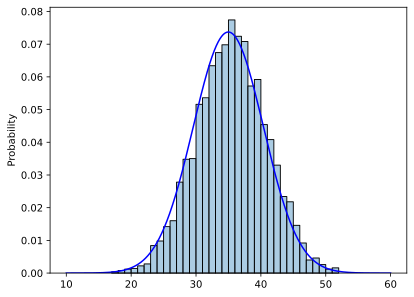

In [43]:
plt.figure(1)
bins = np.arange(np.min(clt_y), np.max(clt_y))
sns.histplot(clt_y, bins=bins, stat='probability', color='#8FBBD9')
plt.plot(kde_x, kde_y, color='blue')
plt.show()

### Central Limit Theorem in the Convolution

Basically, if you have many random variables $X_1, X_2, ..., X_n$, each of them is independent, and follows a specific distuibution. When you add these variables together, and the number of these variables is large enough, for example over 10, than the distuibution you get is normal distuibution. In other words, if you convolve a random variable to another, and do it many many times, the result is normal distuibution, no matter what distuibution single variable follows.

In our simulation, we assume that all the variables follow uniform distuibution, just to simply the problem.

In [75]:
N = 10
conv_x = stats.uniform.rvs(size=(10, N))
print(conv_x[:5])

[[0.892  0.7055 0.3391 0.9638 0.8329 0.7387 0.4532 0.6892 0.9367 0.7393]
 [0.7206 0.2522 0.0538 0.1394 0.7331 0.8112 0.5564 0.0745 0.9139 0.9345]
 [0.4362 0.3627 0.5463 0.4766 0.5571 0.4137 0.1449 0.4043 0.0374 0.7644]
 [0.821  0.7811 0.8152 0.3785 0.0907 0.801  0.2966 0.3473 0.2545 0.8064]
 [0.2146 0.9438 0.365  0.5862 0.2841 0.492  0.695  0.8688 0.4109 0.1225]]


In [113]:
conv_y = conv_x[:, 0]
for col in range(1, conv_x.shape[1]):
    conv_y = np.convolve(conv_x[:, col], conv_y)
conv_y = (conv_y - np.min(conv_y)) / (np.max(conv_y) - np.min(conv_y))
mean = np.mean(conv_y)
sigma = np.std(conv_y)

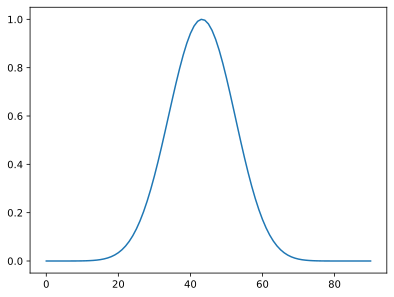

In [116]:
kde_x = np.linspace(np.min(conv_y), np.max(conv_y), 1000)
kde_y = stats.norm.pdf(kde_x, loc=mean, scale=sigma)
plt.figure(2)
plt.plot(conv_y)
# plt.plot(kde_y)
plt.show()